# Titanic

## Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

## Collecting data

In [10]:
# import data
train_data = pd.read_csv('Data/train.csv');
test_data = pd.read_csv('Data/test.csv');
test_results = pd.read_csv('Data/gender_submission.csv');

In [11]:
# column names
columns = list(train_data);

## Data analysis

In [13]:
# missing values analysis
# check how many missing values are in each column
missingValues = train_data.isna().sum();
missingValues = missingValues.sort_values(ascending=False);
print(missingValues);

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [31]:
def column_analysis(column):
    column_survived = train_data.loc[train_data["Survived"]==1][column].dropna();
    column_dead = train_data.loc[train_data["Survived"]==0][column].dropna();
    plt.hist(column_survived,bins=25,alpha=0.5,label=column+' for survived');
    plt.hist(column_dead,bins=25,alpha=0.5,label=column+' for dead');
    plt.legend(loc='upper right');
    plt.show();

def stacked_bar_columns(column):
    column_survived = train_data.loc[train_data["Survived"]==1][column].dropna();
    column_dead = train_data.loc[train_data["Survived"]==0][column].dropna();
    column_survived.value_counts().plot.bar(color="#006D2C",label="Survived");
    column_dead.value_counts().plot.bar(bottom=column_survived.value_counts(),color="#31A354",stacked=True,label="Dead");
    plt.legend(loc='upper right');
    plt.show();

def stacked_bar_class(column):
    uniqueValues = train_data[column].dropna().unique();
    uniqueValues.sort();
    margin_bottom = pd.Series(data=[0,0])
    colors = ["#006D2C", "#31A354","#74C476"];
    for num, value in enumerate(uniqueValues):
        col = train_data.loc[train_data[column]==value]["Survived"].dropna();
        col_values = col.value_counts().loc[[0,1]];
        col_values.plot.bar(bottom=margin_bottom,color=colors[num],stacked=True,label=value);
        margin_bottom += col_values;
    plt.legend(loc='upper right');
    plt.show();

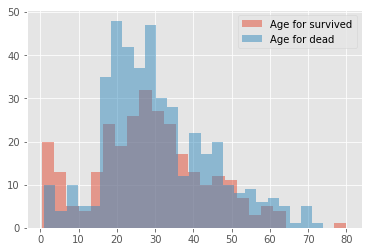

In [26]:
column_analysis("Age");

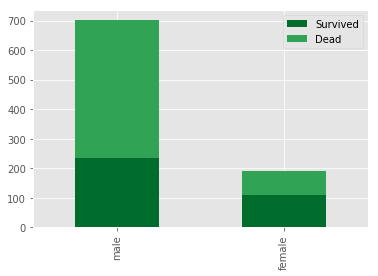

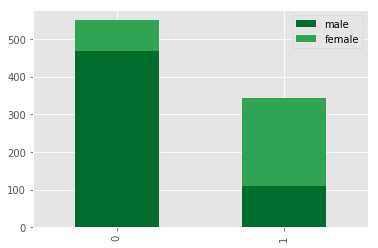

In [27]:
# 'Sex' column analysis
stacked_bar_columns("Sex");
stacked_bar_class("Sex");

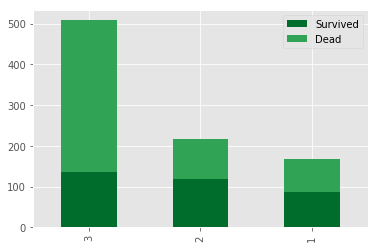

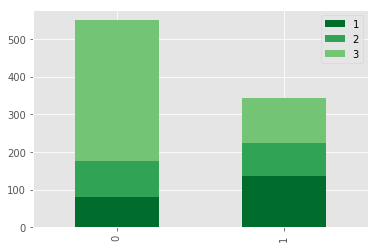

In [33]:
# 'Pclass' column analysis
stacked_bar_columns("Pclass");
stacked_bar_class("Pclass");

In [ ]:
# 'SibSp' column analysis

In [ ]:
# 'Parch' column analysis

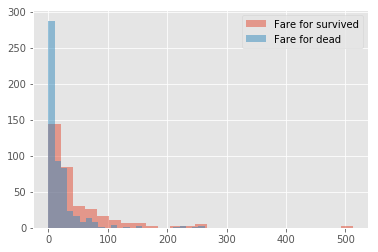

In [29]:
# 'Fare' column analysis
column_analysis("Fare");

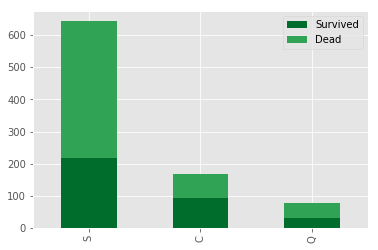

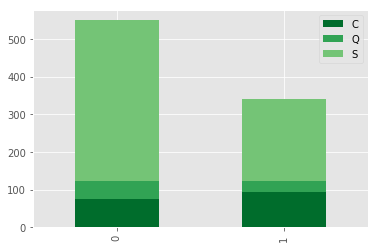

In [32]:
# 'Embarked' column analysis
stacked_bar_columns("Embarked");
stacked_bar_class("Embarked");

## Feature engineering

### Dealing with missing values

### Tokenization

### Quantization/Binning

### Power Transforms

### Scaling/Normalisation

## Feature selection

## Modeling

## Charting